# Statistical Plotting with Seaborn
## Create a linear regression plot with sns.lmplot()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
auto = pd.read_csv("data/auto-mpg.csv")
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


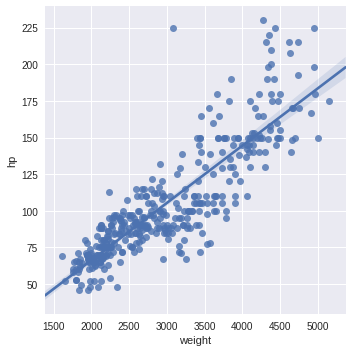

In [15]:
sns.lmplot(x="weight", y="hp", data=auto)

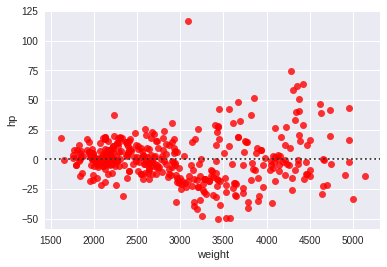

In [16]:
sns.residplot(x="weight", y="hp", data=auto, color="red")

## Customization
- Default sns.lmplot() or sns.residplot() won't allow changing color or alpha
- color and alpha customization can be done with the scatter_kws config

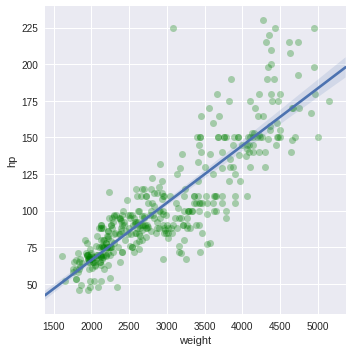

In [17]:
sns.lmplot(x="weight", y="hp", data=auto, scatter_kws={'alpha':0.3, "color" : "green"})

## Create residual plot with sns.residplot()

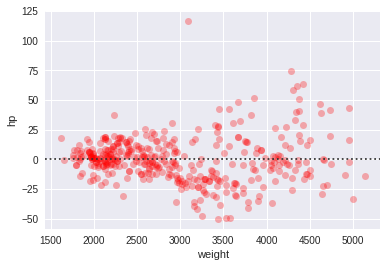

In [18]:
sns.residplot(x="weight", y="hp", data=auto, color="red", scatter_kws={'alpha':0.3})

## Higher-order regressions
When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

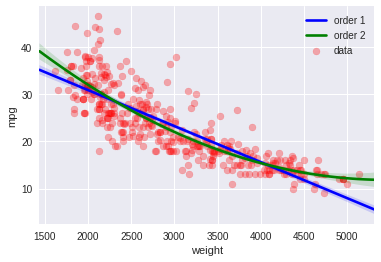

In [25]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto["mpg"], label='data', color='red', marker='o', alpha=0.3)

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, order=1, color="blue", scatter=None, label="order 1")

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x="weight", y="mpg", data=auto, order=2, color="green",scatter=None, label="order 2")

# Add a legend and display the plot
plt.legend(loc="upper right")
plt.show()

## Grouping linear regressions by hue
Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the hue argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

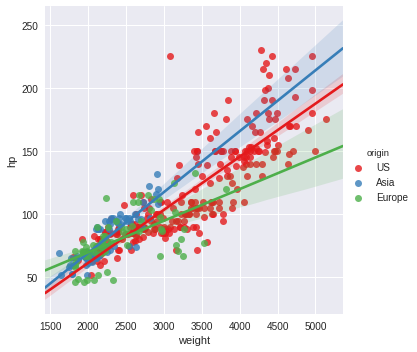

In [36]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x="weight", y="hp", data=auto, hue="origin", palette="Set1")

## Grouping linear regressions by row or column
Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The sns.lmplot() accepts the arguments row and/or col to arrangements of subplots for regressions.

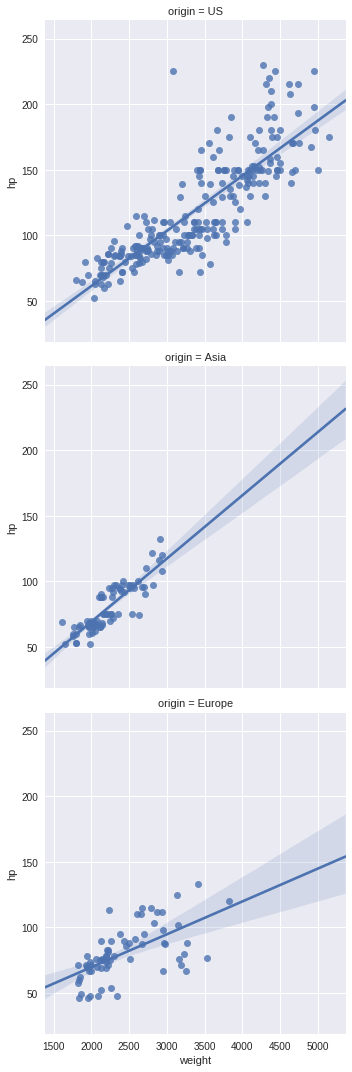

In [37]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x="weight", y="hp", data=auto, row="origin")

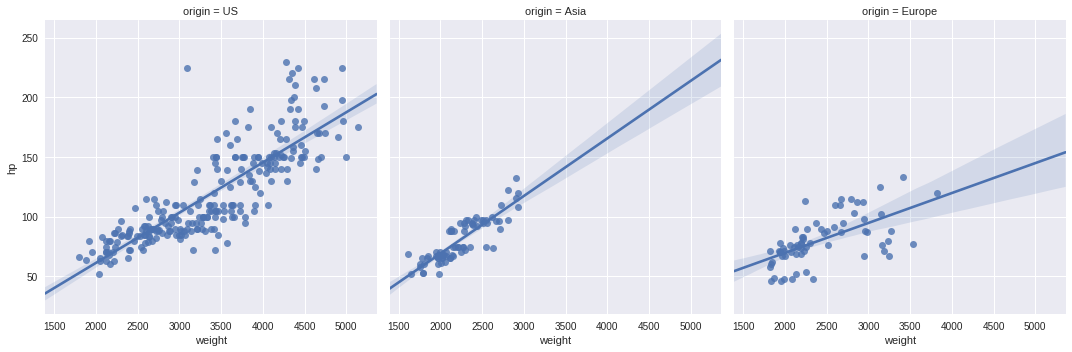

In [39]:
# Plot linear regressions between 'weight' and 'hp' grouped column-wise by 'origin'
sns.lmplot(x="weight", y="hp", data=auto, col="origin")

## Visualizing univariate distributions
Visualization techniques used for univariate data
- strip plot
- swarm plot
- violin plot

### Constructing strip plots
Regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

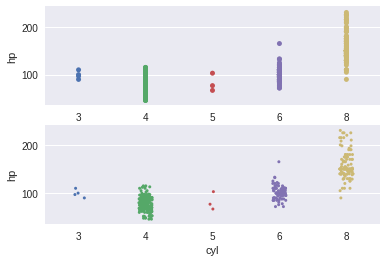

In [40]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x="cyl", y="hp", data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x="cyl", y="hp", data=auto, jitter=True, size=3)

### Constructing swarm plots
a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

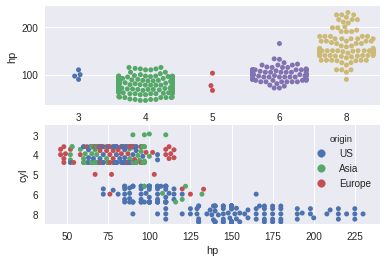

In [42]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x="cyl", y="hp", data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x="hp", y="cyl", data=auto, hue="origin", orient="h")

### Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

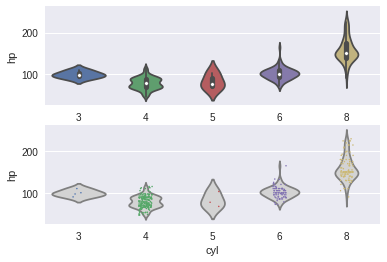

In [43]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x="cyl", y="hp", data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x="cyl", y="hp", data=auto, color="lightgray", inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x="cyl", y="hp", data=auto, jitter=True, size=1.5)

## Visualizing multivariate distributions
Visualizing:
- bivariate data
- multivariate data
- Visualizing relationships in multivariate data
    - joint plots
    - pair plots
    - heat maps

### Plotting joint distributions
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

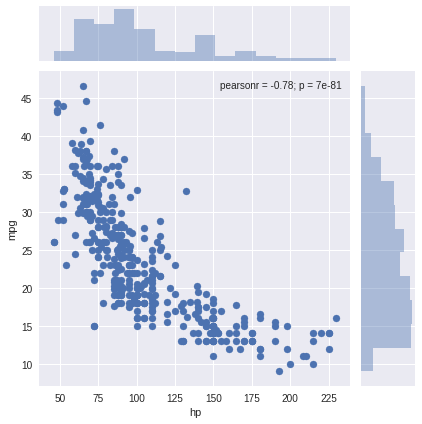

In [44]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x="hp", y="mpg", data=auto)

The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

- kind='scatter' uses a scatter plot of the data points
- kind='reg' uses a regression plot (default order 1)
- kind='resid' uses a residual plot
- kind='kde' uses a kernel density estimate of the joint distribution
- kind='hex' uses a hexbin plot of the joint distribution

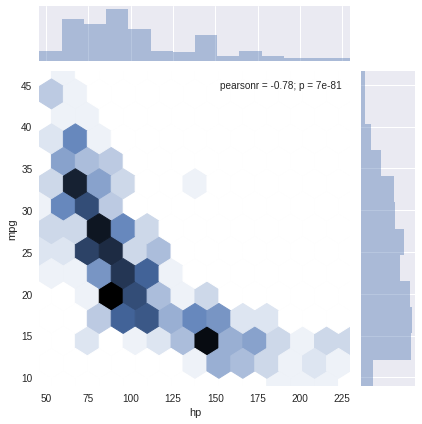

In [45]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x="hp", y="mpg", data=auto, kind="hex")

### Plotting distributions pairwise
Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

In this exercise, you will use a DataFrame auto comprising only three columns from the original auto-mpg data set.

In [46]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


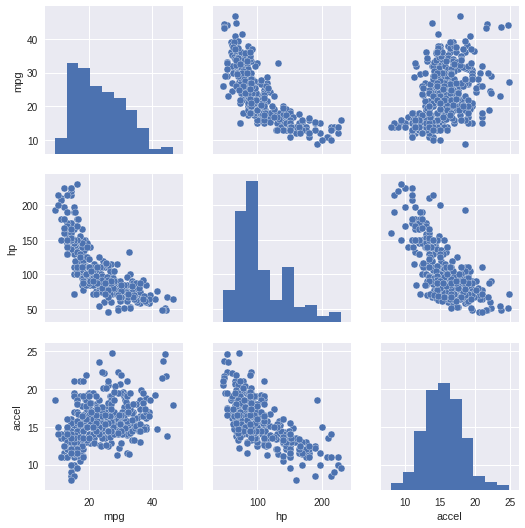

In [48]:
sub_auto = auto[["mpg", "hp", "accel", "origin"]]
sns.pairplot(sub_auto)

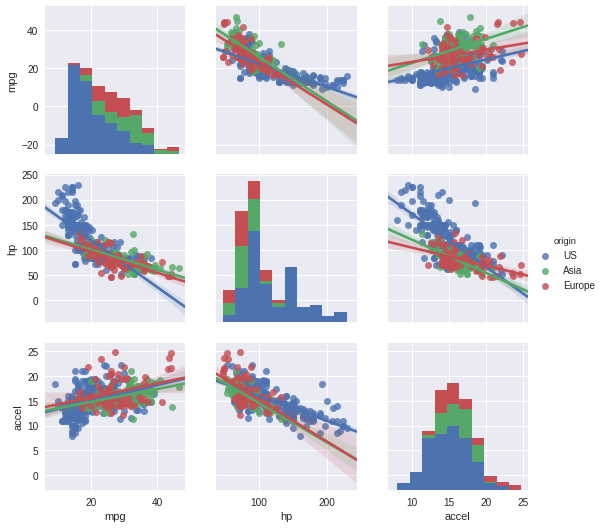

In [54]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(sub_auto, kind="reg", hue="origin")

### Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In [75]:
import numpy as np
mpg = auto["mpg"]
hp = auto["hp"]
accel = auto["accel"]
auto_cov = np.corrcoef([mpg, hp, accel])

In [76]:
auto_cov

array([[ 1.        , -0.77842678,  0.42332854],
       [-0.77842678,  1.        , -0.68919551],
       [ 0.42332854, -0.68919551,  1.        ]])

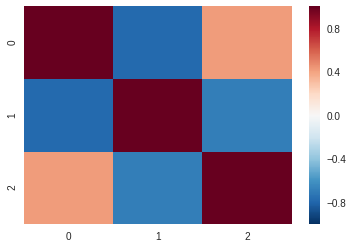

In [77]:
sns.heatmap(auto_cov)